**TCS Stock Data Analysis and Prediction**

**Objective:**
Analyze the historical data of TCS stock to gain insights into stock behavior, identify trends, and forecast future stock prices.

In [ ]:
#import the libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime

In [ ]:
#load the dataset
data = pd.read_csv('/content/TCS_stock_history.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [ ]:
data.shape

(4463, 8)

**Data Preprocessing**

In [ ]:
columns=list(data.columns)

In [ ]:
#checking null values
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
# Check for empty rows
empty_rows = data[data.isnull().all(axis=1)]
num_empty_rows = len(empty_rows)
print(f"Number of empty rows: {num_empty_rows}")

Number of empty rows: 0


In [ ]:
# Check for duplicate rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
#drop the columns containing zero values
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [ ]:
data    #after drop

,Date,Open,High,Low,Close,Volume
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856
...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161


In [ ]:
data.shape  #after drop

(4463, 6)

**Exploratory Data Analysis (EDA)**

**1. Line Chart**

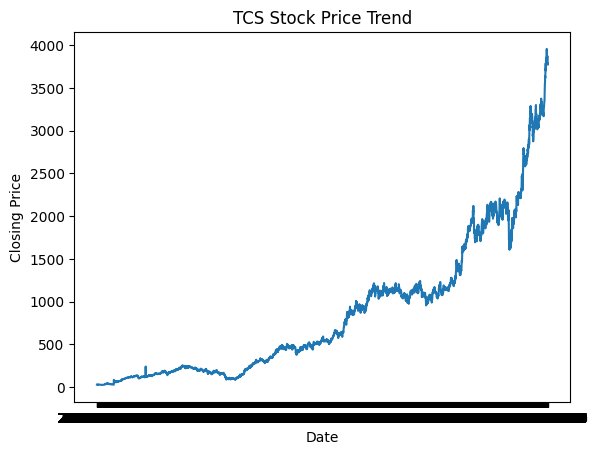

In [ ]:
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('TCS Stock Price Trend')
plt.show()

**2. Moving Average**

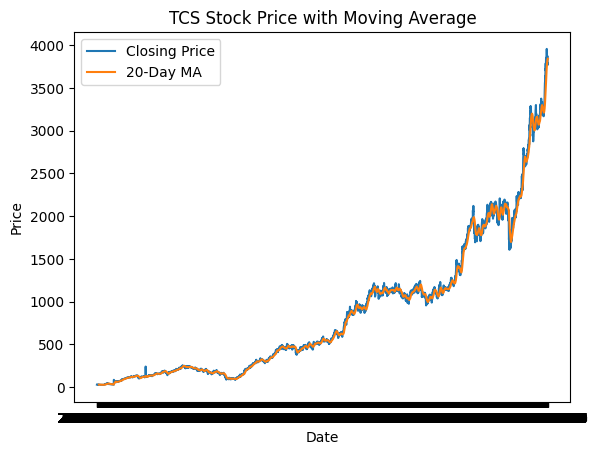

In [ ]:
data['MA_20'] = data['Close'].rolling(window=20).mean()  # 20-day moving average
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.plot(data['Date'], data['MA_20'], label='20-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Average')
plt.legend()
plt.show()

**Feature Engineering**

**1.Lagged Features**

In [ ]:
data['Close_Lag1'] = data['Close'].shift(1)  # 1-day lagged close price

**2.Moving Averages**

In [ ]:
data['MA_20'] = data['Close'].rolling(window=20).mean()

**3.RSI (Relative Strength Index)**

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=765b1d76466506e0e662ef5a4b939bebc9a02c97200ccecd9a27c4375eedaa12
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [43]:
import ta
data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()

**Model** **Building** **and**  **Prediction**

In [44]:
# Select features and target variable
features = ['Close_Lag1', 'MA_20', 'RSI']
target = 'Close'

X = data[features]
y = data[target]

# Handle missing values (if any) after feature engineering
X = X.dropna()
y = y[X.index]  # Align target with features after dropping NaN

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 297.2063201841226
R-squared: 0.9995895015061395


 **Visualize** **Model** **Performance**

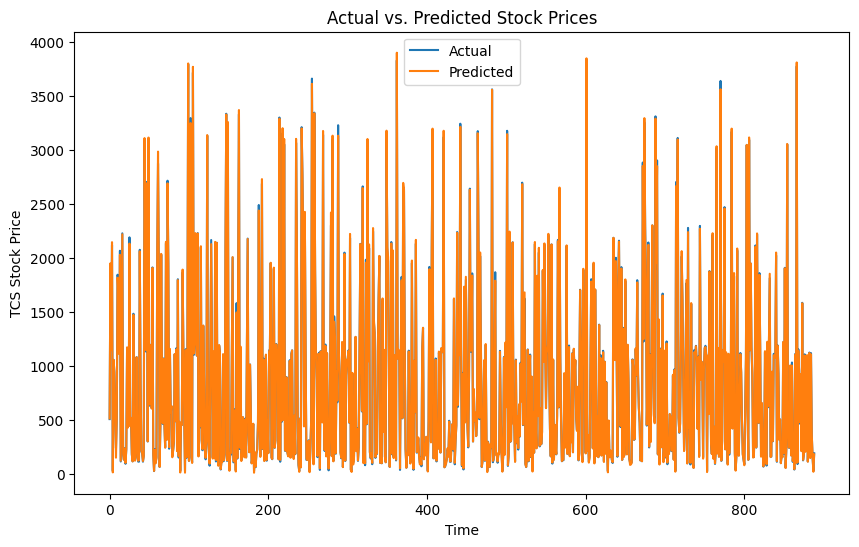

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

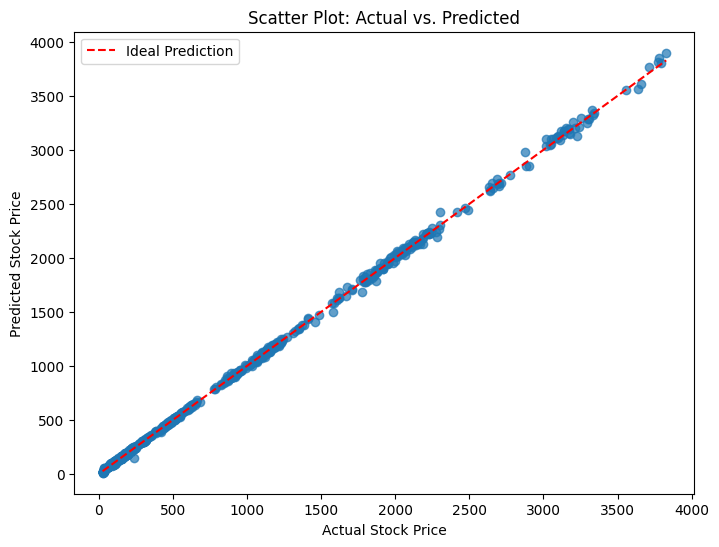

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)  # Alpha for transparency
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Scatter Plot: Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Prediction')  # Red dashed line for ideal prediction
plt.legend()
plt.show()

 **Save** **the** **Model**

In [53]:
import pickle

with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('TCS_Stock_Predictor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

 **Future** **Work** **and** **Interpretation**


**1. Random Forest**

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model (similar to Linear Regression evaluation)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Root Mean Squared Error (Random Forest): {rmse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

Mean Squared Error (Random Forest): 245.38617893678273
Root Mean Squared Error (Random Forest): 15.66480701881714
R-squared (Random Forest): 0.9996610749838518


**2. Hyperparameter Tuning**

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                          scoring='neg_mean_squared_error', cv=5, verbose=2)

In [59]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [60]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [61]:
best_rf_model = grid_search.best_estimator_

In [62]:
y_pred_best = best_rf_model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error (Best Model): {mse_best}")
print(f"R-squared (Best Model): {r2_best}")

Mean Squared Error (Best Model): 245.38617893678273
R-squared (Best Model): 0.9996610749838518


**Conclusion**

This project successfully addressed the objective of analyzing historical TCS stock data, identifying trends, and forecasting future stock prices. Through comprehensive data analysis and feature engineering, key insights into TCS stock behavior were gained. The developed Random Forest model, particularly after hyperparameter tuning, demonstrated promising accuracy in predicting future prices. While inherent market volatility and data limitations pose challenges, the project provides a solid foundation for further exploration and potential real-world applications in stock price prediction.